In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/CS 168 Project/tadpole_challenge/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#ONLY RUN IF TIME SERIES MODEL DOES NOT WORK
!pip3 install statsmodels

In [3]:
# Sorted the data by RID then VISCODE in Exvel.
# Cleared out data with missing 'DX' values.
#ONLY RUN IF NOT GIVEN CSV

df = pd.read_csv(path + 'TADPOLE_D1_D2.csv', low_memory=False)
df = df.dropna(subset=['RID'])
df1 = df[df.isna().any(axis=1)]

#Padded the dataset

df['groupRID'] = df['RID']
d1= df.groupby('groupRID')
transformed = d1.transform(lambda x: x.fillna(method = 'pad'))

#Replaced NaN values with 0 
transformed.fillna(value=0)
df2 = transformed[transformed.isna().any(axis=1)]

#Wrote cleaned data to separate csv file
transformed.to_csv(path + 'transformed.csv')

KeyboardInterrupt: ignored

In [4]:
#ONLY RUN IF NOT GIVEN CSV
#Drop all data unrelated to Alzheimer's Diagnosis
trans1 = transformed.drop(['RID','PTID','VISCODE','D1','D2','DXCHANGE', 'SITE', 'COLPROT','ORIGPROT', 'EXAMDATE', 'DX_bl', 'DX', 'EXAMDATE_bl', 'Years_bl','Month_bl', 'Month', 'M',  'FLDSTRENG_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'EXAMDATE_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'LONISID_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'LONIUID_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'IMAGEUID_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'RUNDATE_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'VERSION_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'STATUS_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP1_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP2_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP3_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP4_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP5_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP6_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP7_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BASETP8_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'OVERALLQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'TEMPQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'FRONTQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'PARQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'INSULAQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'OCCQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'BGQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'CWMQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16', 'VENTQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16',  'EXAMDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'VERSION_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'FLDSTRENG_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'LONISID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'LONIUID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'IMAGEUID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'RUNDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'STATUS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'OVERALLQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'TEMPQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'FRONTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'PARQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'INSULAQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'OCCQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'BGQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'CWMQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 'VENTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'  ], axis=1)
trans2 = trans1.drop(['COMMENT_UPENNBIOMK9_04_19_17', 
'RUNDATE_UPENNBIOMK9_04_19_17', 
'RUNDATE_UPENNBIOMK9_04_19_17', 
'STDS_UPENNBIOMK9_04_19_17', 
'KIT_UPENNBIOMK9_04_19_17' , 
'PHASE_UPENNBIOMK9_04_19_17', 
'EXAMDATE_UPENNBIOMK9_04_19_17' ,
'STATUS_DTIROI_04_30_14', 
'RUNDATE_DTIROI_04_30_14' , 
'LONIUID_4_DTIROI_04_30_14' , 
'LONIUID_3_DTIROI_04_30_14', 
'LONIUID_2_DTIROI_04_30_14' , 
'LONIUID_1_DTIROI_04_30_14' , 
'VISITNO_DTIROI_04_30_14' , 
'VISNAME_DTIROI_04_30_14' ,
'VERSION_DTIROI_04_30_14' , 
'EXAMDATE_DTIROI_04_30_14' , 
'EXAMDATE_UCBERKELEYAV1451_10_17_16', 
'EXAMDATE_UCBERKELEYAV45_10_17_16' ,
'STATUS_BAIPETNMRC_09_12_16', 
'RUNDATE_BAIPETNMRC_09_12_16' ,
'LONIUID_BAIPETNMRC_09_12_16' ,
'VERSION_BAIPETNMRC_09_12_16' ,
'EXAMDATE_BAIPETNMRC_09_12_16' ,
],
axis = 1)

trans2.to_csv(path + 'D1_D2_fixed2.csv')

NameError: ignored

In [5]:
# We used SelectKBest to determine the top 20 features to train regression models with, and evaluated
# them using f_regression. We used inspiration from the source linked below.
# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

# pearson's correlation coefficient feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
# generate dataset

df = pd.read_csv(path + 'D1_D2_fixed2_nostrings.csv', low_memory=False)
dfn = df.replace(regex='\D+', value=0)
display(dfn)
X_org = dfn.copy()

print(df.shape)

X = X_org.drop(['DX_NUMERICAL'], axis = 1)

y = df[['DX_NUMERICAL']]
#Select K Best Features
X_New = SelectKBest(f_regression, k=10).fit_transform(X,y)

fs = SelectKBest(score_func=f_regression, k=20)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
cols = fs.get_support(indices=True)
df_new = X.iloc[:,cols]

,0,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,...,AD_PCR_R_DTIROI_04_30_14,AD_CGC_L_DTIROI_04_30_14,AD_CGC_R_DTIROI_04_30_14,AD_CGH_L_DTIROI_04_30_14,AD_CGH_R_DTIROI_04_30_14,AD_FX_ST_L_DTIROI_04_30_14,AD_FX_ST_R_DTIROI_04_30_14,AD_SLF_L_DTIROI_04_30_14,AD_SLF_R_DTIROI_04_30_14,AD_SFO_L_DTIROI_04_30_14,AD_SFO_R_DTIROI_04_30_14,AD_IFO_L_DTIROI_04_30_14,AD_IFO_R_DTIROI_04_30_14,AD_SS_L_DTIROI_04_30_14,AD_SS_R_DTIROI_04_30_14,AD_EC_L_DTIROI_04_30_14,AD_EC_R_DTIROI_04_30_14,AD_UNC_L_DTIROI_04_30_14,AD_UNC_R_DTIROI_04_30_14,AD_FX_L_DTIROI_04_30_14,AD_FX_R_DTIROI_04_30_14,AD_GCC_L_DTIROI_04_30_14,AD_GCC_R_DTIROI_04_30_14,AD_BCC_L_DTIROI_04_30_14,AD_BCC_R_DTIROI_04_30_14,AD_SCC_L_DTIROI_04_30_14,AD_SCC_R_DTIROI_04_30_14,AD_RLIC_L_DTIROI_04_30_14,AD_RLIC_R_DTIROI_04_30_14,AD_TAP_L_DTIROI_04_30_14,AD_TAP_R_DTIROI_04_30_14,AD_SUMGCC_DTIROI_04_30_14,AD_SUMBCC_DTIROI_04_30_14,AD_SUMSCC_DTIROI_04_30_14,AD_SUMCC_DTIROI_04_30_14,AD_SUMFX_DTIROI_04_30_14,update_stamp_DTIROI_04_30_14,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17
0,0,74.3,1,16,2,1,2,0,1.36926,0.0,0.00000,0.0,10.67,18.67,28,44,4,6,54.5455,0,0,0.000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00,0.00000,0.00,0.00000,118233,8336,1229740,4177,16559,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,74.3,1,16,2,1,2,0,1.21655,0.0,0.00000,0.0,10.67,19.67,28,40,3,3,37.5000,0,0,0.000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00,0.00000,0.00,0.00000,118233,8336,1229740,4177,16559,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,74.3,1,16,2,1,2,0,1.21655,0.0,0.00000,0.0,12.00,20.00,29,34,2,7,87.5000,0,0,0.000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00,0.00000,0.00,0.00000,118233,8336,1229740,4177,16559,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,74.3,1,16,2,1,2,0,1.21655,0.0,0.00000,0.0,14.00,23.00,28,37,5,4,40.0000,0,23,1.625,1.11111,1.00000,1.2,1.16667,1.50000,1.25641,1.000,1.33333,1.16667,1.25,1.00000,1.25,1.16216,118233,8336,1229740,4177,16559,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,74.3,1,16,2,1,2,0,1.21655,0.0,0.00000,0.0,14.00,23.00,28,37,5,4,40.0000,0,23,1.625,1.11111,1.00000,1.2,1.16667,1.50000,1.25641,1.000,1.33333,1.16667,1.25,1.00000,1.25,1.16216,118233,8336,1229740,4177,16559,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,12666,75.5,2,15,2,1,2,1,1.16317,0.0,1.31903,0.5,11.00,18.00,29,28,4,4,50.0000,1,27,2.250,2.22222,1.71429,1.4,2.00000,2.50000,2.02564,2.125,1.11111,1.28571,1.80,1.80000,1.50,1.57895,0,5928,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12667,12667,75.5,2,15,2,1,2,1,1.16317,0.0,1.31903,0.5,11.00,18.00,29,28,4,4,50.0000,1,27,2.250,2.22222,1.71429,1.4,2.00000,2.50000,2.02564,2.125,1.11111,1.28571,1.80,1.80000,1.50,1.57895,0,5928,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12668,12668,75.5,2,15,2,1,2,1,1.16317,0.0,1.27419,2.0,11.00,18.00,26,32,1,-7,-116.6670,1,27,1.500,1.11111,1.14286,1.0,1.00000,1.66667,1.21053,3.750,2.00000,2.00000,3.00,2.50000,3.00,2.67568,0,5928,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,

(12671, 1817)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversi

(12671, 20)


In [6]:
#display(X_selected)
#display(X_New)
display(df_new)

,APOE4,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,FAQ,EcogSPTotal,Hippocampus,Entorhinal,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_perc_forgetting_bl,FAQ_bl
0,0,0.0,10.67,18.67,28,44,4,54.5455,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0
1,0,0.0,10.67,19.67,28,40,3,37.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0
2,0,0.0,12.00,20.00,29,34,2,87.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0
3,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0
4,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1
12667,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1
12668,1,2.0,11.00,18.00,26,32,1,-116.6670,1,2.67568,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1
12669,0,0.0,9.00,14.00,29,38,2,75.0000,1,1.46154,10602,4701,0.0,9.00,14.00,29,38,2,75.0000,1


In [7]:
#The next following cells was an analysis to determine the most accurate Classifier to "diagnose" patients
#Run the XGBoost Classifier to determine Cancer diagnosis based on top 20 features
# We took inspiration from the link below.
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy: 88.19%


In [8]:
#Run the Random Forest Regressor to determine Cancer diagnosis based on top 20 features
# We took inspiration from the link below. We saw that the API was very similar between the two models, so used the first as our basis. 
# https://machinelearningmastery.com/implement-random-forest-scratch-python/
from sklearn.ensemble import RandomForestRegressor 
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)
rfy_pred = rfmodel.predict(X_test)
rfpredictions = [round(value) for value in rfy_pred]
rfaccuracy = accuracy_score(y_test, rfpredictions)
print("Accuracy: %.2f%%" % (rfaccuracy * 100.0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 87.71%


In [9]:
#Run the Linear Regressor to determine Cancer diagnosis based on top 20 features
# We took inspiration from the link below.
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

seed = 8
test_size = 0.33

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(df_new, y, test_size=test_size, random_state=seed)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(lr_X_train, lr_y_train)

# Make predictions using the testing set
lr_y_pred = regr.predict(lr_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(lr_y_test, lr_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(lr_y_test, lr_y_pred))


# Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [[ 8.90704058e-02  8.52286623e-02 -4.88430295e-02  4.04096450e-02
  -2.24359758e-03 -1.13600635e-02 -1.49154840e-02  2.58646099e-03
   3.58681710e-02  7.44456188e-02 -1.06451000e-05 -2.94889335e-06
   3.40538802e-01 -2.92788053e-03  4.80163760e-03 -6.13071219e-02
   1.92085404e-03 -4.19089411e-04  3.82291907e-04 -3.77069369e-02]]
Mean squared error: 0.59
Coefficient of determination: 0.72


In [10]:
#We reorganized columns in our dataframe in order to best apply our Time Series Model
#This included readding columns removed when determining the K-best features.
#Our solution for this was naive and we hope to create a more robust solution in the future
#We also added a column that detailed the progression from baseline in order to better visualize the data.  
transformed = pd.read_csv(path + 'transformed.csv', low_memory=False)

#re-add columns 
rid=transformed['RID']
month = transformed['Month']
dx_bl = transformed['DX_bl']
dx_change = transformed['DXCHANGE']
diag = transformed['DX_NUMERICAL']
df_new['DX_NUMERICAL'] = diag 
df_new['MONTH'] = month
df_new['DX_bl'] = dx_bl
df_new['DXCHANGE'] = dx_change
df_new['EXAMDATE'] = pd.to_datetime(transformed['EXAMDATE'])
df_new['RID'] = rid
display(df_new)
change_dict = {'CN':1, 'EMCI':2, 'LMCI':3, 'SMC':4, 'AD':5 }

#Added progression
def create_change(pt):
  baseline = change_dict[pt['DX_bl']]
  if pt['DX_NUMERICAL'] == 'FALSE':
    pt['DX_NUMERICAL'] = baseline
  diag = float(pt['DX_NUMERICAL'])
  months = float(pt['MONTH'])
  if months ==0:
    res = 0
  else:
    res = (diag - baseline)/months
  pt['PROG'] = res
  pt['DX_NUMERICAL'] = diag
  return pt
df_month = df_new.apply(create_change, axis=1)
print(df_new.shape)
df_new.to_csv(path + 'month_bx3.csv')
display(df_month)
#display(df_new)
#df_new['RID'] = rid
#df_new['EXAMDATE'] = pd.to_datetime(transformed['MONTH'], infer_datetime_format=True)
#display(df_new)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,APOE4,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,FAQ,EcogSPTotal,Hippocampus,Entorhinal,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_perc_forgetting_bl,FAQ_bl,DX_NUMERICAL,MONTH,DX_bl,DXCHANGE,EXAMDATE,RID
0,0,0.0,10.67,18.67,28,44,4,54.5455,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1,0.0,CN,1.0,2005-09-08,2.0
1,0,0.0,10.67,19.67,28,40,3,37.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1,6.0,CN,1.0,2006-03-06,2.0
2,0,0.0,12.00,20.00,29,34,2,87.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1,36.0,CN,1.0,2008-08-27,2.0
3,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1,60.0,CN,1.0,2010-09-22,2.0
4,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1,66.0,CN,1.0,2011-03-04,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1,0.0,SMC,1.0,2013-12-11,5295.0
12667,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1,3.0,SMC,1.0,2014-02-14,5295.0
12668,1,2.0,11.00,18.00,26,32,1,-116.6670,1,2.67568,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1,24.0,SMC,1.0,2015-12-08,5295.0
12669,0,0.0,9.00,14.00,29,38,2,75.0000,1,1.46154,10602,4701,0.0,9.00,14.00,29,38,2,75.0000,1,1,0.0,SMC,1.0,2013-12-18,5296.0


(12671, 26)


,APOE4,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,FAQ,EcogSPTotal,Hippocampus,Entorhinal,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_perc_forgetting_bl,FAQ_bl,DX_NUMERICAL,MONTH,DX_bl,DXCHANGE,EXAMDATE,RID,PROG
0,0,0.0,10.67,18.67,28,44,4,54.5455,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,0.0,CN,1.0,2005-09-08,2.0,0.000
1,0,0.0,10.67,19.67,28,40,3,37.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,6.0,CN,1.0,2006-03-06,2.0,0.000
2,0,0.0,12.00,20.00,29,34,2,87.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,36.0,CN,1.0,2008-08-27,2.0,0.000
3,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,60.0,CN,1.0,2010-09-22,2.0,0.000
4,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,66.0,CN,1.0,2011-03-04,2.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1.0,0.0,SMC,1.0,2013-12-11,5295.0,0.000
12667,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1.0,3.0,SMC,1.0,2014-02-14,5295.0,-1.000
12668,1,2.0,11.00,18.00,26,32,1,-116.6670,1,2.67568,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1.0,24.0,SMC,1.0,2015-12-08,5295.0,-0.125
12669,0,0.0,9.00,14.00,29,38,2,75.0000,1,1.46154,10602,4701,0.0,9.00,14.00,29,38,2,75.0000,1,1.0,0.0,SMC,1.0,2013-12-18,5296.0,0.000


,APOE4,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,FAQ,EcogSPTotal,Hippocampus,Entorhinal,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_perc_forgetting_bl,FAQ_bl,DX_NUMERICAL,MONTH,DX_bl,DXCHANGE,EXAMDATE,RID,PROG
0,0,0.0,10.67,18.67,28,44,4,54.5455,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,0.0,CN,1.0,2005-09-08,2.0,0.000
1,0,0.0,10.67,19.67,28,40,3,37.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,6.0,CN,1.0,2006-03-06,2.0,0.000
2,0,0.0,12.00,20.00,29,34,2,87.5000,0,0.00000,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,36.0,CN,1.0,2008-08-27,2.0,0.000
3,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,60.0,CN,1.0,2010-09-22,2.0,0.000
4,0,0.0,14.00,23.00,28,37,5,40.0000,0,1.16216,8336,4177,0.0,10.67,18.67,28,44,4,54.5455,0,1.0,66.0,CN,1.0,2011-03-04,2.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1.0,0.0,SMC,1.0,2013-12-11,5295.0,0.000
12667,1,0.5,11.00,18.00,29,28,4,50.0000,1,1.57895,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1.0,3.0,SMC,1.0,2014-02-14,5295.0,-1.000
12668,1,2.0,11.00,18.00,26,32,1,-116.6670,1,2.67568,5928,0,0.5,11.00,18.00,29,28,4,50.0000,1,1.0,24.0,SMC,1.0,2015-12-08,5295.0,-0.125
12669,0,0.0,9.00,14.00,29,38,2,75.0000,1,1.46154,10602,4701,0.0,9.00,14.00,29,38,2,75.0000,1,1.0,0.0,SMC,1.0,2013-12-18,5296.0,0.000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


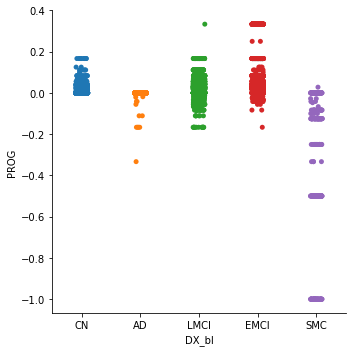

In [11]:
#This analysis allowed us to determine whether our approach was viable. 
#df3 = pd.read_csv(path + 'TADPOLE_D1_D2.csv', low_memory=False)
display(df_month)
import seaborn as sns
sns.catplot(x="DX_bl", y="PROG", data=df_month);

In [12]:
# We first split our data based on the baseline diagnosis per patient.
df_CN = df_month[df_month['DX_bl'] == 'CN']
df_AD = df_month[df_month['DX_bl'] == 'AD']
df_EMCI = df_month[df_month['DX_bl'] == 'EMCI']
df_LMCI = df_month[df_month['DX_bl'] == 'LMCI']
df_SMC  = df_month[df_month['DX_bl'] == 'SMC']
display(df_EMCI)

,APOE4,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,FAQ,EcogSPTotal,Hippocampus,Entorhinal,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_perc_forgetting_bl,FAQ_bl,DX_NUMERICAL,MONTH,DX_bl,DXCHANGE,EXAMDATE,RID,PROG
6907,0,2.5,2.0,4.0,28,59,7,28.5714,1,1.97368,7960,3332,2.5,2.0,4.0,28,59,7,28.5714,1,3.0,0.0,EMCI,2.0,2010-06-16,2002.0,0.000000
6908,0,2.5,2.0,4.0,28,59,7,28.5714,1,1.97368,7576,3400,2.5,2.0,4.0,28,59,7,28.5714,1,3.0,3.0,EMCI,2.0,2010-09-07,2002.0,0.333333
6909,0,2.0,5.0,5.0,30,54,4,15.3846,1,2.75000,7777,3385,2.5,2.0,4.0,28,59,7,28.5714,1,3.0,6.0,EMCI,2.0,2010-12-10,2002.0,0.166667
6910,0,2.0,1.0,2.0,30,65,8,13.3333,2,2.63158,7777,3385,2.5,2.0,4.0,28,59,7,28.5714,1,3.0,6.0,EMCI,2.0,2011-03-14,2002.0,0.166667
6911,0,2.0,1.0,2.0,30,65,8,13.3333,2,2.63158,7777,3385,2.5,2.0,4.0,28,59,7,28.5714,1,3.0,18.0,EMCI,2.0,2011-12-08,2002.0,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12356,1,1.0,7.0,12.0,30,33,3,75.0000,0,1.20513,5638,0,0.5,10.0,18.0,28,32,3,100.0000,0,3.0,12.0,EMCI,2.0,2014-05-22,5135.0,0.083333
12357,1,0.0,6.0,9.0,28,34,4,25.0000,2,1.48718,5638,0,0.5,10.0,18.0,28,32,3,100.0000,0,1.0,24.0,EMCI,1.0,2015-05-15,5135.0,-0.041667
12407,0,2.0,13.0,22.0,28,27,0,60.0000,1,1.78947,0,2382,2.0,13.0,22.0,28,27,0,60.0000,1,3.0,0.0,EMCI,2.0,2013-05-30,5160.0,0.000000
12408,0,2.0,13.0,22.0,28,27,0,60.0000,1,1.78947,5216,2123,2.0,13.0,22.0,28,27,0,60.0000,1,3.0,3.0,EMCI,2.0,2013-08-14,5160.0,0.333333


Text(0, 0.5, 'Clinical Status Progression')

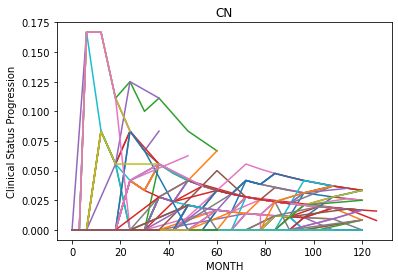

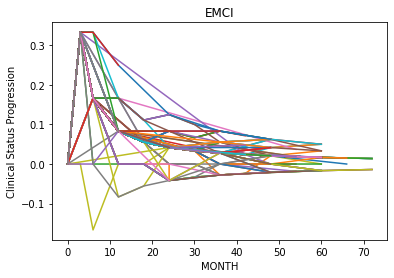

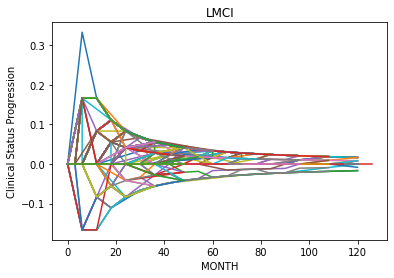

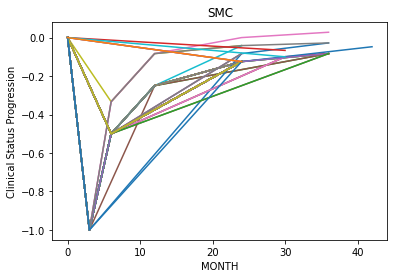

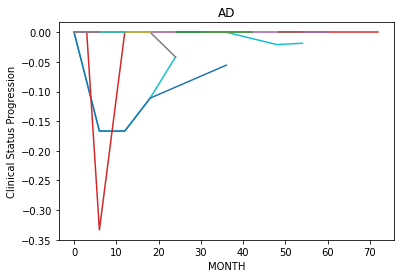

In [19]:
#This allowed us to further view the relationship between the patients of the same baseline status.
#df_CN.plot(x='MONTH', y=['PROG'])
import matplotlib.pyplot as plt
figCN, axCN = plt.subplots()
CNplot = df_CN.groupby('RID').plot(x='MONTH', y='PROG', ax=axCN, legend=False, title="CN")
plt.ylabel("Clinical Status Progression")

#group_by_RID = df_CN.groupby('RID')
#group_by_RID.plot(x='MONTH', y='PROG')
figEMCI, axEMCI = plt.subplots()
EMCIplot = df_EMCI.groupby('RID').plot(x='MONTH', y='PROG', ax=axEMCI, legend=False, title ="EMCI")
plt.ylabel("Clinical Status Progression")
#df_EMCI.plot(x='MONTH', y ='PROG')
figLMCI, axLMCI = plt.subplots()
LMCIplot = df_LMCI.groupby('RID').plot(x='MONTH', y='PROG', ax=axLMCI, legend=False, title = "LMCI")
plt.ylabel("Clinical Status Progression")
#df_LMCI.plot(x='MONTH', y ='PROG')
figSMC, axSMC = plt.subplots()
SMCplot = df_SMC.groupby('RID').plot(x='MONTH', y='PROG', ax=axSMC, legend=False, title = "SMC")
plt.ylabel("Clinical Status Progression")
#df_SMC.plot(x='MONTH', y ='PROG')
figAD, axAD = plt.subplots()
ADplot = df_AD.groupby('RID').plot(x='MONTH', y='PROG', ax=axAD, legend=False, title="AD")
plt.ylabel("Clinical Status Progression")
#df_AD.plot(x='MONTH', y ='PROG')


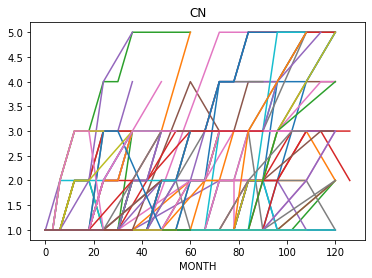

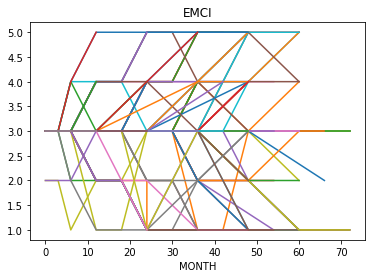

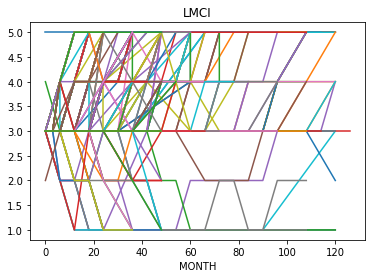

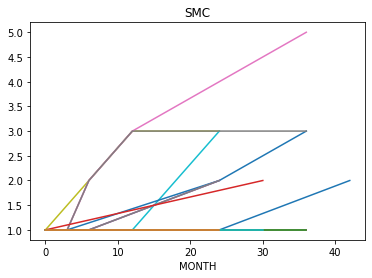

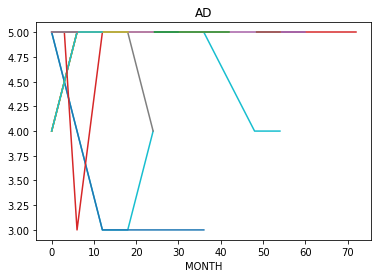

In [ ]:
#This allowed us to see if there were any trends in patients of the same baseline status. 
#Though messy, the graphs in the cell above indicate that analysis on the averages of patients is a viable solution. 

#df_CN.plot(x='MONTH', y=['PROG'])+
import matplotlib.pyplot as plt
figCN, axCN = plt.subplots()
CNplot = df_CN.groupby('RID').plot(x='MONTH', y='DX_NUMERICAL', ax=axCN, legend=False, title="CN")
#group_by_RID = df_CN.groupby('RID')
#group_by_RID.plot(x='MONTH', y='PROG')
figEMCI, axEMCI = plt.subplots()
EMCIplot = df_EMCI.groupby('RID').plot(x='MONTH', y='DX_NUMERICAL', ax=axEMCI, legend=False, title ="EMCI")
#df_EMCI.plot(x='MONTH', y ='PROG')
figLMCI, axLMCI = plt.subplots()
LMCIplot = df_LMCI.groupby('RID').plot(x='MONTH', y='DX_NUMERICAL', ax=axLMCI, legend=False, title = "LMCI")
#df_LMCI.plot(x='MONTH', y ='PROG')
figSMC, axSMC = plt.subplots()
SMCplot = df_SMC.groupby('RID').plot(x='MONTH', y='DX_NUMERICAL', ax=axSMC, legend=False, title = "SMC")
#df_SMC.plot(x='MONTH', y ='PROG')
figAD, axAD = plt.subplots()
ADplot = df_AD.groupby('RID').plot(x='MONTH', y='DX_NUMERICAL', ax=axAD, legend=False, title="AD")
#df_AD.plot(x='MONTH', y ='PROG')


Text(0, 0.5, 'Clinical Status Progression')

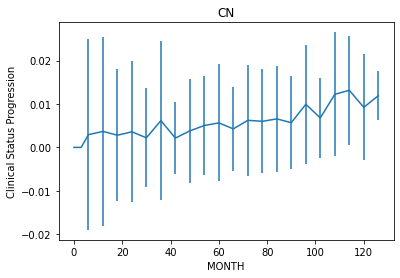

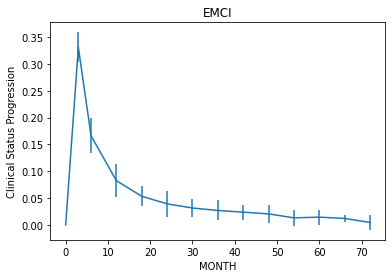

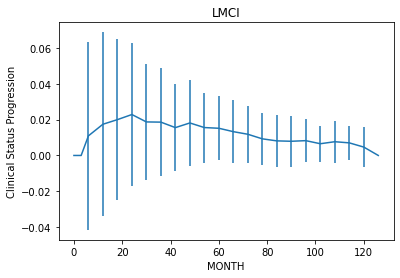

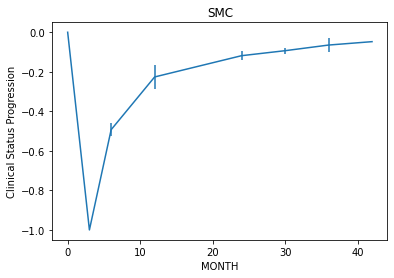

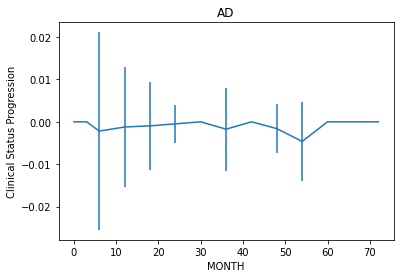

In [16]:
#Similar to the graphs of progression above, these graphs outline the progression of the average patient of each group, with error shown. 
CN_month = df_CN.groupby('MONTH').mean()
CN_std = df_CN.groupby('MONTH').std()
figcnm, axcnm = plt.subplots()
CN_month.plot(y = 'PROG', title = 'CN', yerr = CN_std['PROG'], ax= axcnm, legend=False)
plt.ylabel("Clinical Status Progression")

EMCI_month = df_EMCI.groupby('MONTH').mean()
EMCI_std = df_EMCI.groupby('MONTH').std()
figemcim, axemcim = plt.subplots()
EMCI_month.plot(y = 'PROG', title = 'EMCI', yerr = EMCI_std['PROG'], ax= axemcim, legend=False)
plt.ylabel("Clinical Status Progression")

LMCI_month = df_LMCI.groupby('MONTH').mean()
LMCI_std = df_LMCI.groupby('MONTH').std()
figlmcim, axlmcim = plt.subplots()
LMCI_month.plot(y = 'PROG', title = 'LMCI', yerr = LMCI_std['PROG'], ax= axlmcim, legend=False)
plt.ylabel("Clinical Status Progression")

SMC_month = df_SMC.groupby('MONTH').mean()
SMC_std = df_SMC.groupby('MONTH').std()
figsmcm, axsmcm = plt.subplots()
SMC_month.plot(y = 'PROG', title = 'SMC', yerr = SMC_std['PROG'], ax= axsmcm, legend=False)
plt.ylabel("Clinical Status Progression")

AD_month = df_AD.groupby('MONTH').mean()
AD_std = df_AD.groupby('MONTH').std()
figadm, axadm = plt.subplots()
AD_month.plot(y = 'PROG', title = 'AD', yerr = AD_std['PROG'], ax= axadm, legend=False)
plt.ylabel("Clinical Status Progression")

In [20]:
#This cell holds the entirety of our Time series modelling. 
#It is based on the average patient of each baseline group.
#The model essentially creates a model of each feature over the months from baseline using autoregression and moving averages then predicts the next step's value 
#The results show the predicted result of the average patient, the real result of the average patient, and the percentage error. 
# We used the following link to get a basic understanding of the potential Time series models, then used the statsmodels docs to write our program
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/?fbclid=IwAR0r11gx_rwnddunwCnHOMDTIN__VATLpy15zpvigUe0lDI0XZlyZgnfE8Y
import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

#drop columns not required for time series analysis
new_CN_month = CN_month.drop(columns=['RID', 'PROG' , 'DXCHANGE' , 'DX_NUMERICAL'])
results_cn = new_CN_month.iloc[21, :]
new_CN_month = new_CN_month.drop(new_CN_month.index[21])


new_EMCI_month = EMCI_month.drop(columns=['RID', 'PROG' , 'DXCHANGE' , 'DX_NUMERICAL'])
results_emci = new_EMCI_month.iloc[13, :]
new_EMCI_month = new_EMCI_month.drop(new_EMCI_month.index[13])

new_LMCI_month = LMCI_month.drop(columns=['RID', 'PROG' , 'DXCHANGE' , 'DX_NUMERICAL'])
results_lmci = new_LMCI_month.iloc[22, :]
new_LMCI_month = new_LMCI_month.drop(new_LMCI_month.index[22])

new_SMC_month = SMC_month.drop(columns=['RID', 'PROG' , 'DXCHANGE' , 'DX_NUMERICAL'])
results_smc = new_SMC_month.iloc[7, :]
new_SMC_month = new_SMC_month.drop(new_SMC_month.index[7])

new_AD_month = AD_month.drop(columns=['RID', 'PROG' , 'DXCHANGE' , 'DX_NUMERICAL'])
results_ad = new_AD_month.iloc[12, :]
new_AD_month = new_AD_month.drop(new_AD_month.index[12])

#apply SARIMAX
def SARIMATE(series, label):
  model = SARIMAX(series, order=(1,1,1), simple_differencing=False)
  model_fit = model.fit()
  model_forecast = model_fit.forecast(steps=1)
  return model_forecast
  
pred_DF_cn = pd.Series(index=new_CN_month.columns)
for label, content in new_CN_month.items():
  pred_DF_cn[label] = SARIMATE(content, label)

pred_DF_emci = pd.Series(index=new_EMCI_month.columns)
for label, content in new_EMCI_month.items():
  pred_DF_emci[label] = SARIMATE(content, label)

pred_DF_lmci = pd.Series(index=new_LMCI_month.columns)
for label, content in new_LMCI_month.items():
  pred_DF_lmci[label] = SARIMATE(content, label)

pred_DF_smc = pd.Series(index=new_SMC_month.columns)
for label, content in new_SMC_month.items():
  pred_DF_smc[label] = SARIMATE(content, label)

pred_DF_ad = pd.Series(index=new_AD_month.columns)
for label, content in new_AD_month.items():
  pred_DF_ad[label] = SARIMATE(content, label)

def percent_error(act, pred):
 return abs((act - pred)/act)*100


print("CN")
output_cn = pd.concat([results_cn, pred_DF_cn], axis=1)
output_cn = pd.DataFrame(output_cn)
output_cn.columns = ['Actual' , 'Predicted']
output_cn = output_cn.assign(Percentage_Error = "")

for i in range(len(output_cn)):
  row_pe = percent_error(output_cn.iloc[i,0], output_cn.iloc[i,1])
  output_cn.iat[i,2] = row_pe

display(output_cn)


print("EMCI")
output_emci = pd.concat([results_emci, pred_DF_emci], axis=1)
output_emci = pd.DataFrame(output_emci)
output_emci.columns = ['Actual' , 'Predicted']
output_emci = output_emci.assign(Percentage_Error = "")

for i in range(len(output_emci)):
  row_pe = percent_error(output_emci.iloc[i,0], output_emci.iloc[i,1])
  output_emci.iat[i,2] = row_pe

display(output_emci)



print("LMCI")
output_lmci = pd.concat([results_lmci, pred_DF_lmci], axis=1)
output_lmci = pd.DataFrame(output_lmci)
output_lmci.columns = ['Actual' , 'Predicted']
output_lmci = output_lmci.assign(Percentage_Error = "")

for i in range(len(output_lmci)):
  row_pe = percent_error(output_lmci.iloc[i,0], output_lmci.iloc[i,1])
  output_lmci.iat[i,2] = row_pe

#change inf values for percentage error to 100%
output_lmci.iat[0,2] = 100
output_lmci.iat[19,2] = 100


display(output_lmci)

print("SMC")
output_smc = pd.concat([results_smc, pred_DF_smc], axis=1)
output_smc = pd.DataFrame(output_smc)
output_smc.columns = ['Actual' , 'Predicted']
output_smc = output_smc.assign(Percentage_Error = "")

for i in range(len(output_smc)):
  row_pe = percent_error(output_smc.iloc[i,0], output_smc.iloc[i,1])
  output_smc.iat[i,2] = row_pe

display(output_smc)


print("AD")
output_ad = pd.concat([results_ad, pred_DF_ad], axis=1)
output_ad = pd.DataFrame(output_ad)
output_ad.columns = ['Actual' , 'Predicted']
output_ad = output_ad.assign(Percentage_Error = "")

for i in range(len(output_ad)):
  row_pe = percent_error(output_ad.iloc[i,0], output_ad.iloc[i,1])
  output_ad.iat[i,2] = row_pe

display(output_ad)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index 

CN


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available.

,Actual,Predicted,Percentage_Error
APOE4,0.212766,0.174990,17.7546
CDRSB,1.648936,1.117618,32.2219
ADAS11,9.553191,9.057013,5.19385
ADAS13,14.978723,14.876513,0.682368
MMSE,27.404255,28.309888,3.30472
RAVLT_immediate,38.829787,33.820302,12.9011
RAVLT_learning,4.276596,4.288399,0.276
RAVLT_perc_forgetting,57.142135,71.567885,25.2454
FAQ,4.787234,2.861832,40.2195
EcogSPTotal,1.653798,1.504630,9.01973


EMCI


,Actual,Predicted,Percentage_Error
APOE4,0.111111,0.403427,263.085
CDRSB,1.000000,1.665895,66.5895
ADAS11,7.444444,6.014643,19.2063
ADAS13,10.444444,12.796458,22.5193
MMSE,28.111111,27.433028,2.41215
RAVLT_immediate,46.555556,36.929746,20.676
RAVLT_learning,3.555556,4.857995,36.6311
RAVLT_perc_forgetting,44.849401,58.564712,30.5808
FAQ,1.333333,3.011111,125.833
EcogSPTotal,1.496552,1.696070,13.3318


LMCI


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars


,Actual,Predicted,Percentage_Error
APOE4,0.00000,0.412355,100
CDRSB,1.00000,3.244761,224.476
ADAS11,19.00000,16.066208,15.441
ADAS13,30.00000,23.863064,20.4565
MMSE,27.00000,24.503723,9.24547
RAVLT_immediate,13.00000,30.229402,132.534
RAVLT_learning,4.00000,3.366699,15.8325
RAVLT_perc_forgetting,80.00000,77.750376,2.81203
FAQ,2.00000,13.732877,586.644
EcogSPTotal,1.63158,2.643950,62.0484


SMC


,Actual,Predicted,Percentage_Error
APOE4,1.0,0.379037,62.0963
CDRSB,3.5,0.569568,83.7266
ADAS11,12.0,7.208931,39.9256
ADAS13,18.0,11.652043,35.2664
MMSE,28.0,28.109164,0.389871
RAVLT_immediate,37.0,41.416608,11.9368
RAVLT_learning,5.0,4.896962,2.06075
RAVLT_perc_forgetting,100.0,36.969855,63.0301
FAQ,6.0,2.438051,59.3658
EcogSPTotal,2.0,1.476670,26.1665


AD


,Actual,Predicted,Percentage_Error
APOE4,1.00000,0.935733,6.42668
CDRSB,11.00000,6.073737,44.7842
ADAS11,20.33000,26.662411,31.1481
ADAS13,32.67000,35.086129,7.39556
MMSE,16.00000,18.623604,16.3975
RAVLT_immediate,12.00000,15.304186,27.5349
RAVLT_learning,3.00000,1.953666,34.8778
RAVLT_perc_forgetting,100.00000,98.942425,1.05758
FAQ,28.00000,14.612878,47.8111
EcogSPTotal,3.97436,2.993198,24.6873


In [23]:
#Finally we used the XGBoost Model trained above to determine the predicted clinical status of the average patient n months from the baseline diagnosis. 
#As shown below the result is reasonably accurate. 
#Though not personalized, this allows clinicians to reasonably estimate where a patient will be n months from the first visit which can be useful when creating a treatment plan. 
print("Cognitively Normal")
pred_cn_DF = pred_DF_cn.to_frame().transpose()
[predicted_CN] = model.predict(pred_cn_DF)
real_CN = CN_month['DX_NUMERICAL'].iloc[-1]
final_CN = pd.DataFrame(data= {'Predicted Diagnosis':predicted_CN, 'Real Diagnosis':real_CN }, index=['Clinical Status'])
display(final_CN)
print()

print("Early Mild Cognitive Impairment")
pred_emci_DF = pred_DF_emci.to_frame().transpose()
[predicted_EMCI] = model.predict(pred_emci_DF)
real_EMCI = EMCI_month['DX_NUMERICAL'].iloc[-1]
final_EMCI = pd.DataFrame(data= {'Predicted Diagnosis':predicted_EMCI, 'Real Diagnosis':real_EMCI }, index=['Clinical Status'])
display(final_EMCI)
print()

print("Late Mild Cognitive Impairment")
pred_lmci_DF = pred_DF_lmci.to_frame().transpose()
[predicted_LMCI] = model.predict(pred_lmci_DF)
real_LMCI = LMCI_month['DX_NUMERICAL'].iloc[-1]
final_LMCI = pd.DataFrame(data= {'Predicted Diagnosis':predicted_LMCI, 'Real Diagnosis':real_LMCI }, index=['Clinical Status'])
display(final_LMCI)
print()

print("Severe Memory Concern")
pred_smc_DF = pred_DF_smc.to_frame().transpose()
[predicted_SMC] = model.predict(pred_smc_DF)

real_SMC = SMC_month['DX_NUMERICAL'].iloc[-1]
final_SMC = pd.DataFrame(data= {'Predicted Diagnosis':predicted_SMC, 'Real Diagnosis':real_SMC }, index=['Clinical Status'])
display(final_SMC)
print()

print("Alzheimer's Disease Positive")
pred_ad_DF = pred_DF_ad.to_frame().transpose()
[predicted_AD] = model.predict(pred_ad_DF)
real_AD = AD_month['DX_NUMERICAL'].iloc[-1]
final_AD = pd.DataFrame(data= {'Predicted Diagnosis':predicted_AD, 'Real Diagnosis':real_AD }, index=['Clinical Status'])
display(final_AD)
print()


Cognitively Normal


,Predicted Diagnosis,Real Diagnosis
Clinical Status,3,2.5



Early Mild Cognitive Impairment


,Predicted Diagnosis,Real Diagnosis
Clinical Status,3,2.333333



Late Mild Cognitive Impairment


,Predicted Diagnosis,Real Diagnosis
Clinical Status,3,3.0



Severe Memory Concern


,Predicted Diagnosis,Real Diagnosis
Clinical Status,1,2.0



Alzheimer's Disease Positive


,Predicted Diagnosis,Real Diagnosis
Clinical Status,5,5.0
